In [9]:
import pandas as pd
#Reading plk file into dataframe
apl_stck_pckl = pd.read_pickle('apple_prices_alpaca.plk')
apl_stck_df=pd.DataFrame(apl_stck_pckl)
apl_stck_df.head()

TypeError: read_pickle() got an unexpected keyword argument 'header'

In [18]:
apl_stck_df = apl_stck_df.sort_values("timestamp")
# apl_stck_df = apl_stck_df.set_index("timestamp")
apl_stck_df.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2015-12-01 09:00:00+00:00,118.88,118.94,118.60,118.65,5825,15,118.696799
2015-12-01 10:00:00+00:00,118.65,118.72,118.50,118.72,7077,24,118.585340
2015-12-01 11:00:00+00:00,118.71,118.99,118.71,118.90,14956,72,118.858641
2015-12-01 12:00:00+00:00,118.88,118.98,118.76,118.94,24677,129,118.857629
2015-12-01 13:00:00+00:00,118.88,119.00,118.60,118.63,95036,309,118.732677


In [6]:
apl_stck_df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'trade_count', 'vwap'], dtype='object')

In [12]:
apl_stck_df.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2015-12-01 09:00:00+00:00,118.88,118.94,118.60,118.65,5825,15,118.696799
2015-12-01 10:00:00+00:00,118.65,118.72,118.50,118.72,7077,24,118.585340
2015-12-01 11:00:00+00:00,118.71,118.99,118.71,118.90,14956,72,118.858641
2015-12-01 12:00:00+00:00,118.88,118.98,118.76,118.94,24677,129,118.857629
2015-12-01 13:00:00+00:00,118.88,119.00,118.60,118.63,95036,309,118.732677


In [23]:
#changing the timestamp column from index to column
apl_stck_df.reset_index(inplace=True)

In [24]:
#converting timestamp to date to make it feasible for calculating day wise values
apl_stck_df['date'] = pd.to_datetime(apl_stck_df['timestamp']).dt.date

In [25]:
apl_stck_df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'trade_count',
       'vwap', 'date'],
      dtype='object')

In [28]:
opening_values=apl_stck_df.groupby('date')['open'].mean().reset_index()

In [29]:
closing_values=apl_stck_df.groupby('date')['close'].mean().reset_index()

In [32]:
open_close_df= pd.merge(opening_values, closing_values, how='inner',on=['date'])

In [33]:
open_close_df.head()

,date,open,close
0,2015-12-01,118.126000,118.020633
1,2015-12-02,117.190625,117.126244
2,2015-12-03,116.072000,115.999981
3,2015-12-04,117.310000,117.537031
4,2015-12-05,119.050000,119.050000


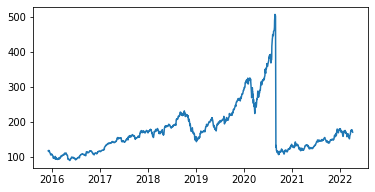

In [35]:
import matplotlib.pyplot as plt
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4) 
top.plot(open_close_df['date'], open_close_df['close'], label = 'Adjusted Close price') 

In [37]:
open_close_df['NextClose'] = open_close_df['close'].shift(-1)

In [38]:
open_close_df.head()

,date,open,close,NextClose
0,2015-12-01,118.126000,118.020633,117.126244
1,2015-12-02,117.190625,117.126244,115.999981
2,2015-12-03,116.072000,115.999981,117.537031
3,2015-12-04,117.310000,117.537031,119.050000
4,2015-12-05,119.050000,119.050000,118.674867


In [39]:
#labels each row with 0 if closing value decreases and 1 if increases or remains same
open_close_df['Label'] = open_close_df.apply(lambda x: 1 if (x['NextClose']>= x['close']) else 0, axis =1)

In [41]:
open_close_df.head()

,date,open,close,NextClose,Label
0,2015-12-01,118.126000,118.020633,117.126244,0
1,2015-12-02,117.190625,117.126244,115.999981,0
2,2015-12-03,116.072000,115.999981,117.537031,1
3,2015-12-04,117.310000,117.537031,119.050000,1
4,2015-12-05,119.050000,119.050000,118.674867,0


In [42]:
open_close_df.to_pickle("processed_data/day_a_stock_closelabel.pkl")
open_close_df.to_pickle("processed_data/day_a_stock_closelabel.csv")